<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(3_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.2_n20.csv',
 'data_multi_delta_3.2_n30.csv',
 'data_multi_delta_3.2_n60.csv',
 'data_multi_delta_3.2_n120.csv',
 'data_multi_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.336232,94.341602,467.741482,614.419315,49.460147,564.959169
1,0.0,1.0,66.879056,66.261642,-1207.399290,-1064.258592,39.553189,-1103.811781
2,0.0,2.0,21.286818,20.493548,69.859916,121.640282,-110.236049,231.876331
3,0.0,3.0,67.165623,80.181015,-278.097334,-120.750697,63.906608,-184.657305
4,0.0,4.0,21.345051,28.670565,-181.916769,-121.901154,-96.101413,-25.799741
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.971854,86.132262,-801.106106,-636.001990,409.990375,-1045.992365
59996,999.0,56.0,50.127960,87.821341,-311.099910,-163.150610,391.977499,-555.128108
59997,999.0,57.0,37.959829,68.894666,-644.848787,-527.994292,251.687115,-779.681407
59998,999.0,58.0,27.903750,86.813881,637.283491,762.001121,351.454283,410.546838


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.336232,94.341602,467.741482,614.419315,49.460147,564.959169
1,0.0,1.0,66.879056,66.261642,-1207.399290,-1064.258592,39.553189,-1103.811781
2,0.0,2.0,21.286818,20.493548,69.859916,121.640282,-110.236049,231.876331
3,0.0,3.0,67.165623,80.181015,-278.097334,-120.750697,63.906608,-184.657305
4,0.0,4.0,21.345051,28.670565,-181.916769,-121.901154,-96.101413,-25.799741
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.971854,86.132262,-801.106106,-636.001990,409.990375,-1045.992365
59996,999.0,56.0,50.127960,87.821341,-311.099910,-163.150610,391.977499,-555.128108
59997,999.0,57.0,37.959829,68.894666,-644.848787,-527.994292,251.687115,-779.681407
59998,999.0,58.0,27.903750,86.813881,637.283491,762.001121,351.454283,410.546838


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    42.336232  94.341602   467.741482   614.419315   49.460147   
      1.0    66.879056  66.261642 -1207.399290 -1064.258592   39.553189   
      2.0    21.286818  20.493548    69.859916   121.640282 -110.236049   
      3.0    67.165623  80.181015  -278.097334  -120.750697   63.906608   
      4.0    21.345051  28.670565  -181.916769  -121.901154  -96.101413   
...                ...        ...          ...          ...         ...   
999.0 55.0   68.971854  86.132262  -801.106106  -636.001990  409.990375   
      56.0   50.127960  87.821341  -311.099910  -163.150610  391.977499   
      57.0   37.959829  68.894666  -644.848787  -527.994292  251.687115   
      58.0   27.903750  86.813881   637.283491   762.001121  351.454283   
      59.0   57.229291  68.336733  -770.708234  -635.142210  277.622249   

                   e_hat  
rep   index               
0.0   0.0     564.959169  
      1.0   -1103.811781  
      2.0     231.876331  
      3.0    -184.657305  
      4.0     -25.799741  
...                  ...  
999.0 55.0  -1045.992365  
      56.0   -555.128108  
      57.0   -779.681407  
      58.0    410.546838  
      59.0   -912.764459  

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    42.336232  94.341602   467.741482   614.419315   49.460147   
      1.0    66.879056  66.261642 -1207.399290 -1064.258592   39.553189   
      2.0    21.286818  20.493548    69.859916   121.640282 -110.236049   
      3.0    67.165623  80.181015  -278.097334  -120.750697   63.906608   
      4.0    21.345051  28.670565  -181.916769  -121.901154  -96.101413   
...                ...        ...          ...          ...         ...   
999.0 55.0   68.971854  86.132262  -801.106106  -636.001990  409.990375   
      56.0   50.127960  87.821341  -311.099910  -163.150610  391.977499   
      57.0   37.959829  68.894666  -644.848787  -527.994292  251.687115   
      58.0   27.903750  86.813881   637.283491   762.001121  351.454283   
      59.0   57.229291  68.336733  -770.708234  -635.142210  277.622249   

                   e_hat  
rep   index               
0.0   0.0     564.959169  
      1.0   -1103.811781  
      2.0     231.876331  
      3.0    -184.657305  
      4.0     -25.799741  
...                  ...  
999.0 55.0  -1045.992365  
      56.0   -555.128108  
      57.0   -779.681407  
      58.0    410.546838  
      59.0   -912.764459  

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,42.336232,94.341602,467.741482,614.419315,49.460147,564.959169
1,0.0,1.0,66.879056,66.261642,-1207.399290,-1064.258592,39.553189,-1103.811781
2,0.0,2.0,21.286818,20.493548,69.859916,121.640282,-110.236049,231.876331
3,0.0,3.0,67.165623,80.181015,-278.097334,-120.750697,63.906608,-184.657305
4,0.0,4.0,21.345051,28.670565,-181.916769,-121.901154,-96.101413,-25.799741
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.971854,86.132262,-801.106106,-636.001990,409.990375,-1045.992365
59996,999.0,56.0,50.127960,87.821341,-311.099910,-163.150610,391.977499,-555.128108
59997,999.0,57.0,37.959829,68.894666,-644.848787,-527.994292,251.687115,-779.681407
59998,999.0,58.0,27.903750,86.813881,637.283491,762.001121,351.454283,410.546838


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2            e            Y       y_hat  \
rep   index                                                               
0.0   0.0    42.336232  94.341602   467.741482   614.419315   49.460147   
      1.0    66.879056  66.261642 -1207.399290 -1064.258592   39.553189   
      2.0    21.286818  20.493548    69.859916   121.640282 -110.236049   
      3.0    67.165623  80.181015  -278.097334  -120.750697   63.906608   
      4.0    21.345051  28.670565  -181.916769  -121.901154  -96.101413   
...                ...        ...          ...          ...         ...   
999.0 55.0   68.971854  86.132262  -801.106106  -636.001990  409.990375   
      56.0   50.127960  87.821341  -311.099910  -163.150610  391.977499   
      57.0   37.959829  68.894666  -644.848787  -527.994292  251.687115   
      58.0   27.903750  86.813881   637.283491   762.001121  351.454283   
      59.0   57.229291  68.336733  -770.708234  -635.142210  277.622249   

                   e_hat  
rep   index               
0.0   0.0     564.959169  
      1.0   -1103.811781  
      2.0     231.876331  
      3.0    -184.657305  
      4.0     -25.799741  
...                  ...  
999.0 55.0  -1045.992365  
      56.0   -555.128108  
      57.0   -779.681407  
      58.0    410.546838  
      59.0   -912.764459  

[60000 rows x 6 columns]

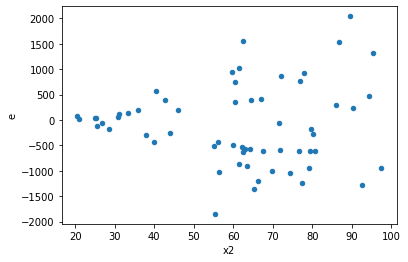

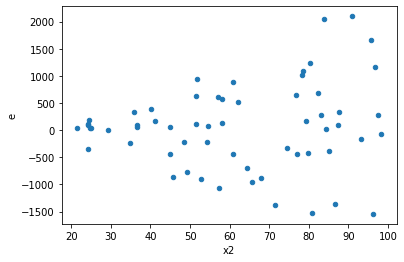

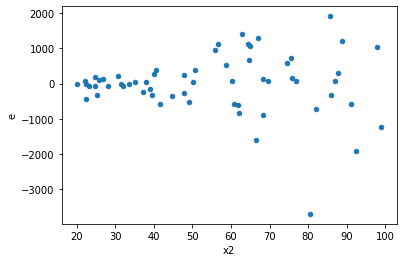

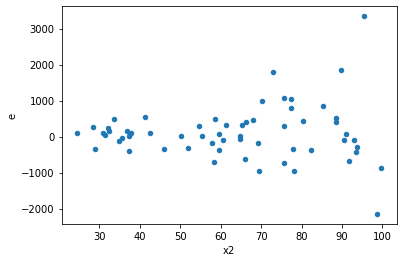

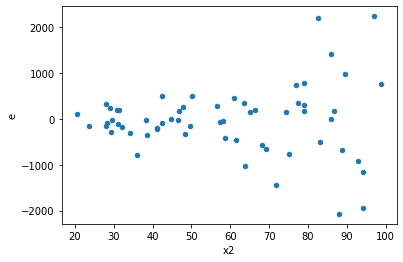

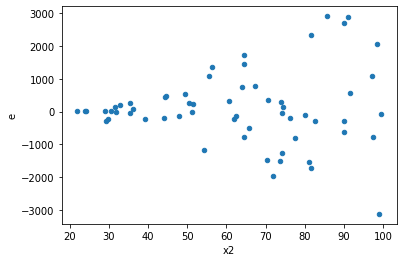

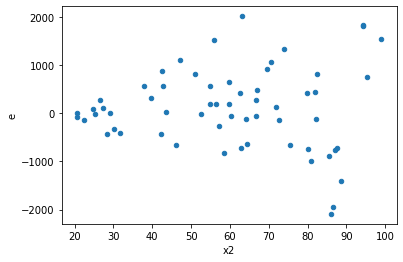

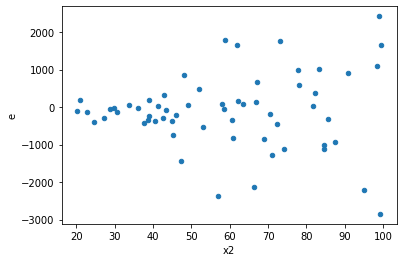

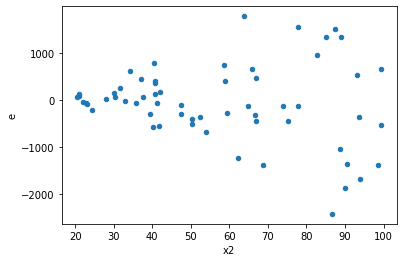

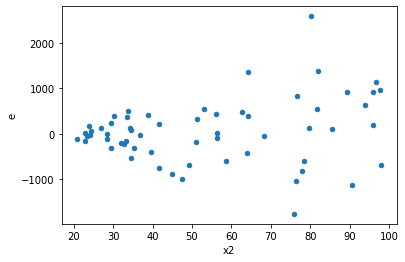

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,22.0,22.0,7110995.208841272,18113938.80736769,323227.05494733056,823360.8548803496,2.54731416283985,0.03309996619498978,0.9834500169025051,0.01654998309749489,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,4194584.711430274,18410598.6085243,190662.9414286488,836845.3912965591,4.3891350098033035,0.0009958248728214603,0.9995020875635893,0.0004979124364107301,Reject001=0 : Heteroscedasticity
2.0,22.0,22.0,1212771.2905986416,34914583.64656571,55125.96775448371,1587026.5293893507,28.78909149418549,3.1493696539541816e-11,0.9999999999842532,1.5746848269770908e-11,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,1974024.852737316,26877930.758176785,89728.40239715073,1221724.125371672,13.61580160498285,5.685090309626162e-08,0.9999999715745485,2.842545154813081e-08,Reject001=0 : Heteroscedasticity
4.0,22.0,22.0,1665180.0511969698,29010018.87829349,75690.002327135,1318637.221740613,17.421550815144833,5.111863154994012e-09,0.9999999974440684,2.555931577497006e-09,Reject001=0 : Heteroscedasticity
5.0,22.0,22.0,3011685.473729798,56487764.93129831,136894.79426044537,2567625.6786953774,18.756196629438026,2.4530968367741934e-09,0.9999999987734516,1.2265484183870967e-09,Reject001=0 : Heteroscedasticity
6.0,22.0,22.0,4688027.7056207005,27809585.13328038,213092.16843730456,1264072.0515127445,5.932043682237231,9.690361813929904e-05,0.9999515481909304,4.845180906964952e-05,Reject001=0 : Heteroscedasticity
7.0,22.0,22.0,3631038.0764246765,38262058.02567055,165047.18529203074,1739184.4557122977,10.537498428919125,6.40832355625065e-07,0.9999996795838222,3.204161778125325e-07,Reject001=0 : Heteroscedasticity
8.0,22.0,22.0,2033311.1338054598,28377271.684710402,92423.23335479363,1289875.9856686546,13.95618762564915,4.480587101340916e-08,0.9999999775970645,2.240293550670458e-08,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,7110995.208841272,18113938.80736769,323227.05494733056,823360.8548803496,2.54731416283985,0.03309996619498978,Reject001=1 : Homoscedasticity
1.0,22.0,22.0,4194584.711430274,18410598.6085243,190662.9414286488,836845.3912965591,4.3891350098033035,0.0009958248728214603,Reject001=0 : Heteroscedasticity
2.0,22.0,22.0,1212771.2905986416,34914583.64656571,55125.96775448371,1587026.5293893507,28.78909149418549,3.1493696539541816e-11,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,1974024.852737316,26877930.758176785,89728.40239715073,1221724.125371672,13.61580160498285,5.685090309626162e-08,Reject001=0 : Heteroscedasticity
4.0,22.0,22.0,1665180.0511969698,29010018.87829349,75690.002327135,1318637.221740613,17.421550815144833,5.111863154994012e-09,Reject001=0 : Heteroscedasticity
5.0,22.0,22.0,3011685.473729798,56487764.93129831,136894.79426044537,2567625.6786953774,18.756196629438026,2.4530968367741934e-09,Reject001=0 : Heteroscedasticity
6.0,22.0,22.0,4688027.7056207005,27809585.13328038,213092.16843730456,1264072.0515127445,5.932043682237231,9.690361813929904e-05,Reject001=0 : Heteroscedasticity
7.0,22.0,22.0,3631038.0764246765,38262058.02567055,165047.18529203074,1739184.4557122977,10.537498428919125,6.40832355625065e-07,Reject001=0 : Heteroscedasticity
8.0,22.0,22.0,2033311.1338054598,28377271.684710402,92423.23335479363,1289875.9856686546,13.95618762564915,4.480587101340916e-08,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    993
Reject001=1 : Homoscedasticity        7
Name: Result_test, dtype: int64